* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visulization for train_identity](#21)
    * [2.2 Visulization for train_transaction](#22)
    * [2.3 Visulization for test_transaction](#23)
* [3.LGBM/LR](#3.LGBM/LR)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math

In [2]:
os.listdir("../input/ieee-fraud-detection")

['test_identity.csv',
 'sample_submission.csv',
 'train_identity.csv',
 'train_transaction.csv',
 'test_transaction.csv']

# 1.DataOverview

There are 5 csv in this data,including 'train_identity.csv','train_transaction.csv','test_transaction.csv','test_identity.csv',and 

'sample_submission.csv'.First, I will use the train data to make some visualization.

Please upvote it if you like this kernel.

Thank you

The photo is from:https://ac-illust.com/tw/clip-art/626399/%E4%B8%80%E9%9A%BB%E9%9E%A0%E8%BA%AC%E7%9A%84%E5%85%94%E5%AD%90

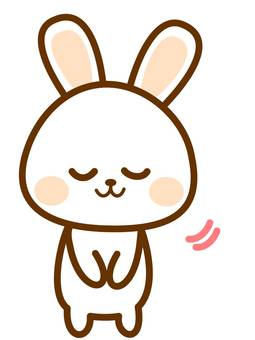

In [3]:
train_identity=pd.read_csv("../input/ieee-fraud-detection/train_identity.csv")
train_transaction=pd.read_csv("../input/ieee-fraud-detection/train_transaction.csv")
test_transaction=pd.read_csv("../input/ieee-fraud-detection/test_transaction.csv")
test_identity=pd.read_csv("../input/ieee-fraud-detection/test_identity.csv")
print("train_identity_data_size: ",len(train_identity))
print("train_transaction_data_size: ",len(train_transaction))
print("test_transaction_data_size: ",len(test_transaction))
print("test_identity_data_size: ",len(test_identity))

train_identity_data_size:  144233
train_transaction_data_size:  590540
test_transaction_data_size:  506691
test_identity_data_size:  141907


# 2.Visualization

<h3 id="21">2.1 Visulization for train_identity</h3>

'train_identity.csv' data size is 144,233,and the variables include 'TransactionID','id_01',id_02,...other 38 type.

There are a lot of missing values in 'train_identity.csv'.especially 'id_24','id_25','id_07','id_08','id_21','id_26'

,'id_22','id_27',and'id_23'.



In [4]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Text(0.5, 1.0, 'counts of missing value for train_identity')

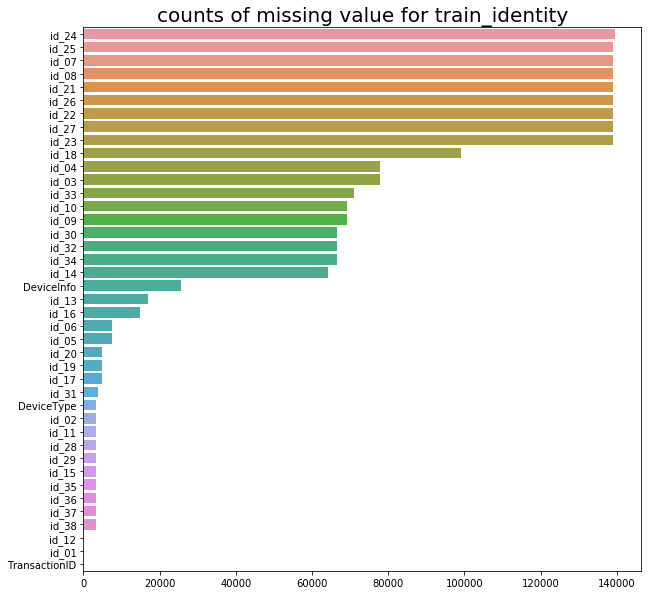

In [5]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_identity.isnull().sum().sort_values(ascending=False),y=train_identity.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for train_identity",size=20)

I only use 'TransanctionID','id_01','id_12','id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11',
'id_02','DeviceType','id_31','id_17','id_19',and 'id_20' 'in train_identity.csv'.

Since there are too many missing values for other variable. 

In [6]:
train_identity_new=pd.DataFrame(train_identity,columns=['TransactionID','id_01','id_12','id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11','id_02','DeviceType','id_31','id_17','id_19','id_20'])
train_identity_new=train_identity_new.dropna(subset=['id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11','id_02','DeviceType','id_31','id_17','id_19','id_20'])
train_identity_new.head()

,TransactionID,id_01,id_12,id_38,id_37,id_36,id_35,id_15,id_29,id_28,id_11,id_02,DeviceType,id_31,id_17,id_19,id_20
0,2987004,0.0,NotFound,T,T,F,T,New,NotFound,New,100.0,70787.0,mobile,samsung browser 6.2,166.0,542.0,144.0
1,2987008,-5.0,NotFound,T,F,F,T,New,NotFound,New,100.0,98945.0,mobile,mobile safari 11.0,166.0,621.0,500.0
2,2987010,-5.0,NotFound,T,T,F,F,Found,Found,Found,100.0,191631.0,desktop,chrome 62.0,121.0,410.0,142.0
3,2987011,-5.0,NotFound,T,T,F,F,New,NotFound,New,100.0,221832.0,desktop,chrome 62.0,225.0,176.0,507.0
4,2987016,0.0,NotFound,T,T,F,T,Found,Found,Found,100.0,7460.0,desktop,chrome 62.0,166.0,529.0,575.0


In [7]:
len(train_identity_new)

138917

Text(0.5, 1.0, 'correlation plot for train_identity_new')

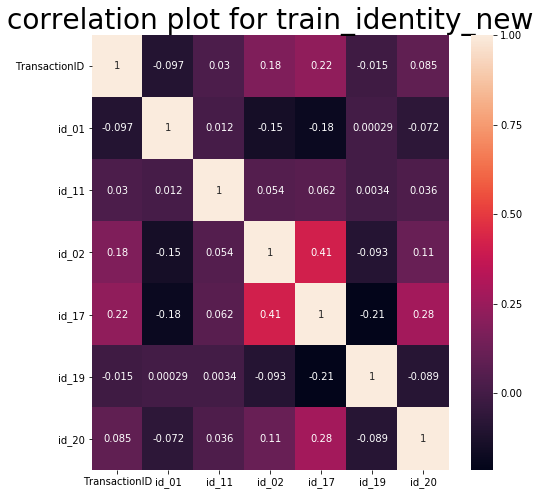

In [8]:
plt.figure(figsize=(8,8))
corr = train_identity_new.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.title("correlation plot for train_identity_new",size=28)

Text(0, 0.5, '')

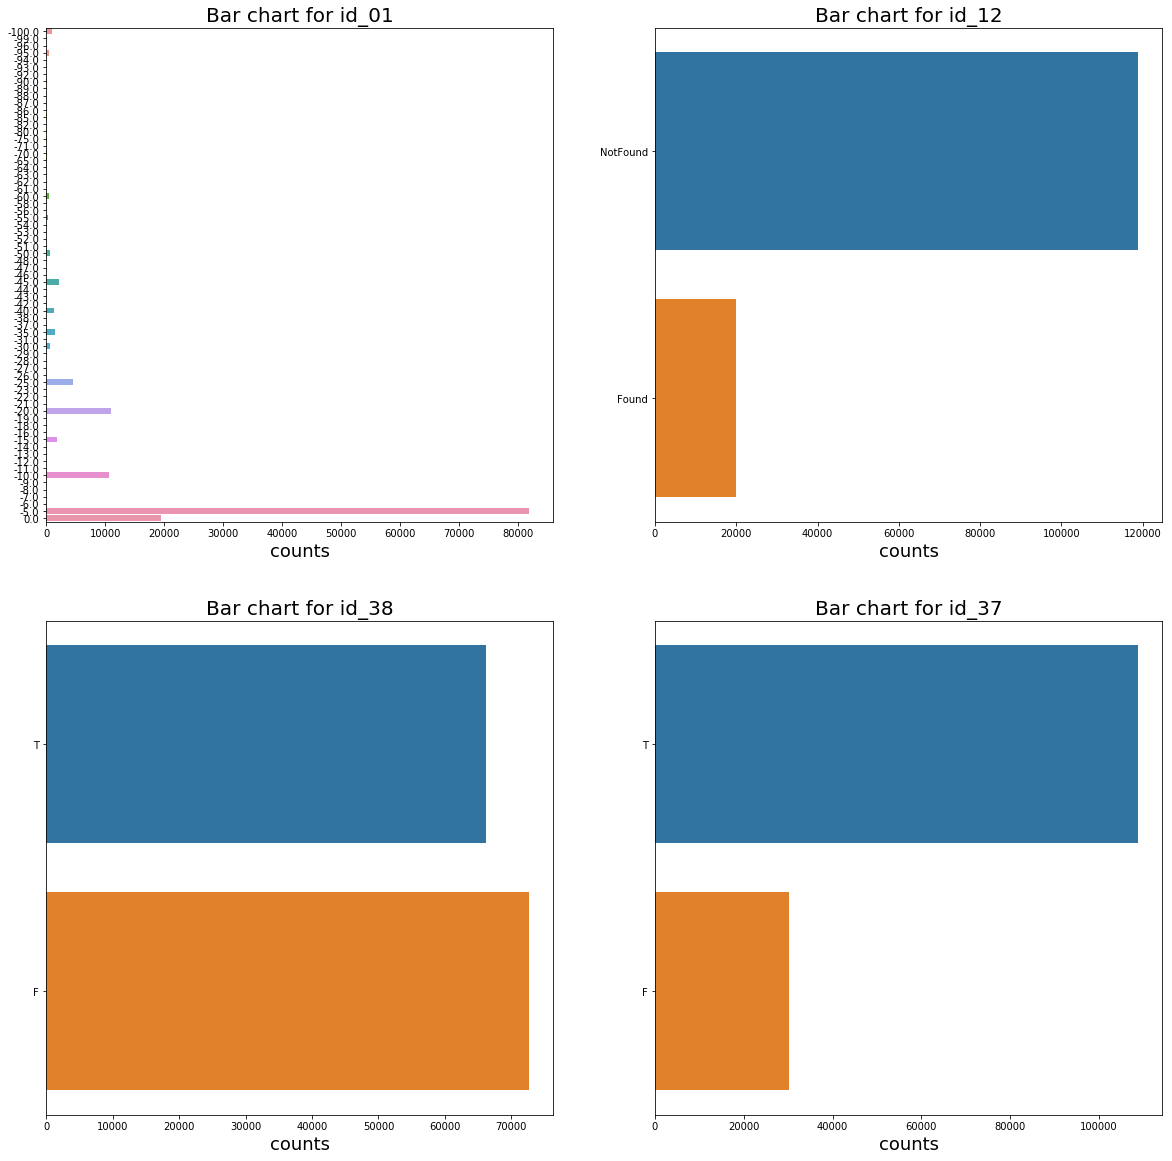

In [9]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=train_identity_new.id_01.value_counts().index
x=train_identity_new.id_01.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0],orient='h')
ax[0,0].set_title("Bar chart for id_01",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

y=train_identity_new.id_12.value_counts().index
x=train_identity_new.id_12.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("Bar chart for id_12",size=20)
ax[0,1].set_xlabel('counts',size=18)
ax[0,1].set_ylabel('')

y=train_identity_new.id_38.value_counts().index
x=train_identity_new.id_38.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0],order=['T','F'])
ax[1,0].set_title("Bar chart for id_38",size=20)
ax[1,0].set_xlabel('counts',size=18)
ax[1,0].set_ylabel('')

y=train_identity_new.id_37.value_counts().index
x=train_identity_new.id_37.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,1],order=['T','F'])
ax[1,1].set_title("Bar chart for id_37",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

Text(0, 0.5, '')

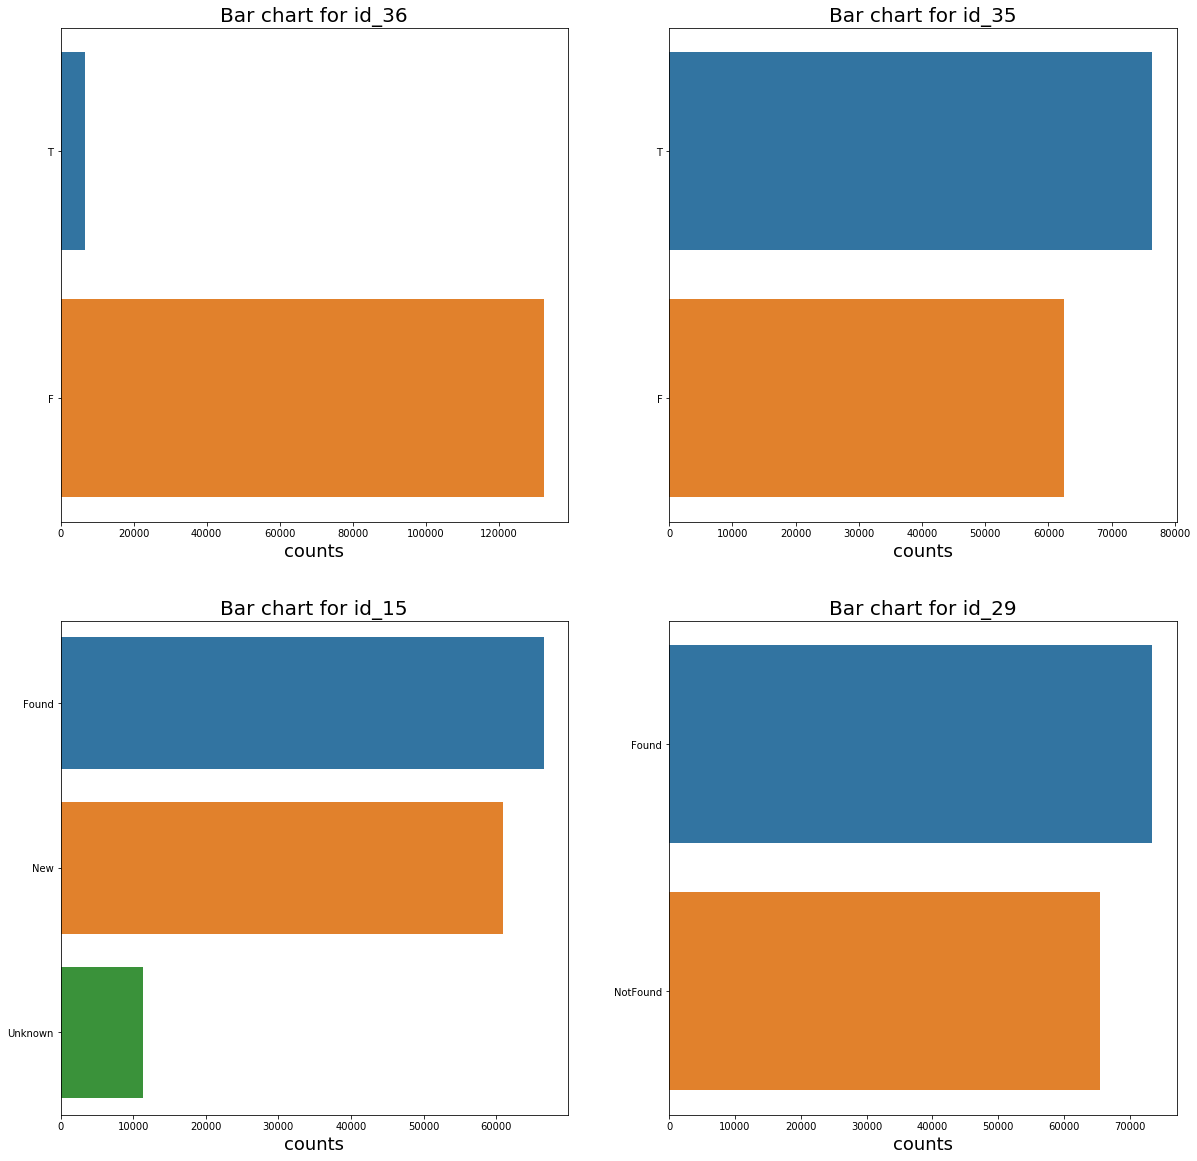

In [10]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=train_identity_new.id_36.value_counts().index
x=train_identity_new.id_36.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0],order=['T','F'])
ax[0,0].set_title("Bar chart for id_36",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

y=train_identity_new.id_35.value_counts().index
x=train_identity_new.id_35.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1],order=['T','F'])
ax[0,1].set_title("Bar chart for id_35",size=20)
ax[0,1].set_xlabel('counts',size=18)
ax[0,1].set_ylabel('')

y=train_identity_new.id_15.value_counts().index
x=train_identity_new.id_15.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("Bar chart for id_15",size=20)
ax[1,0].set_xlabel('counts',size=18)
ax[1,0].set_ylabel('')

y=train_identity_new.id_29.value_counts().index
x=train_identity_new.id_29.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,1])
ax[1,1].set_title("Bar chart for id_29",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

<h3 id="22">2.2 Visulization for train_transaction</h3>

'train_transaction.csv' data size is 590,540,and the variables include 'TransactionID','isFraud','TransactionDT',...other 391 type.

There are a lot of missing values in 'train_transaction.csv'.especially 'dist 2','D7','D13','D14','D12','D6','D8','D9'.

In [11]:
del train_identity
del test_identity
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
len(train_transaction)

590540

Text(0.5, 1.0, 'counts of missing value for train_transaction')

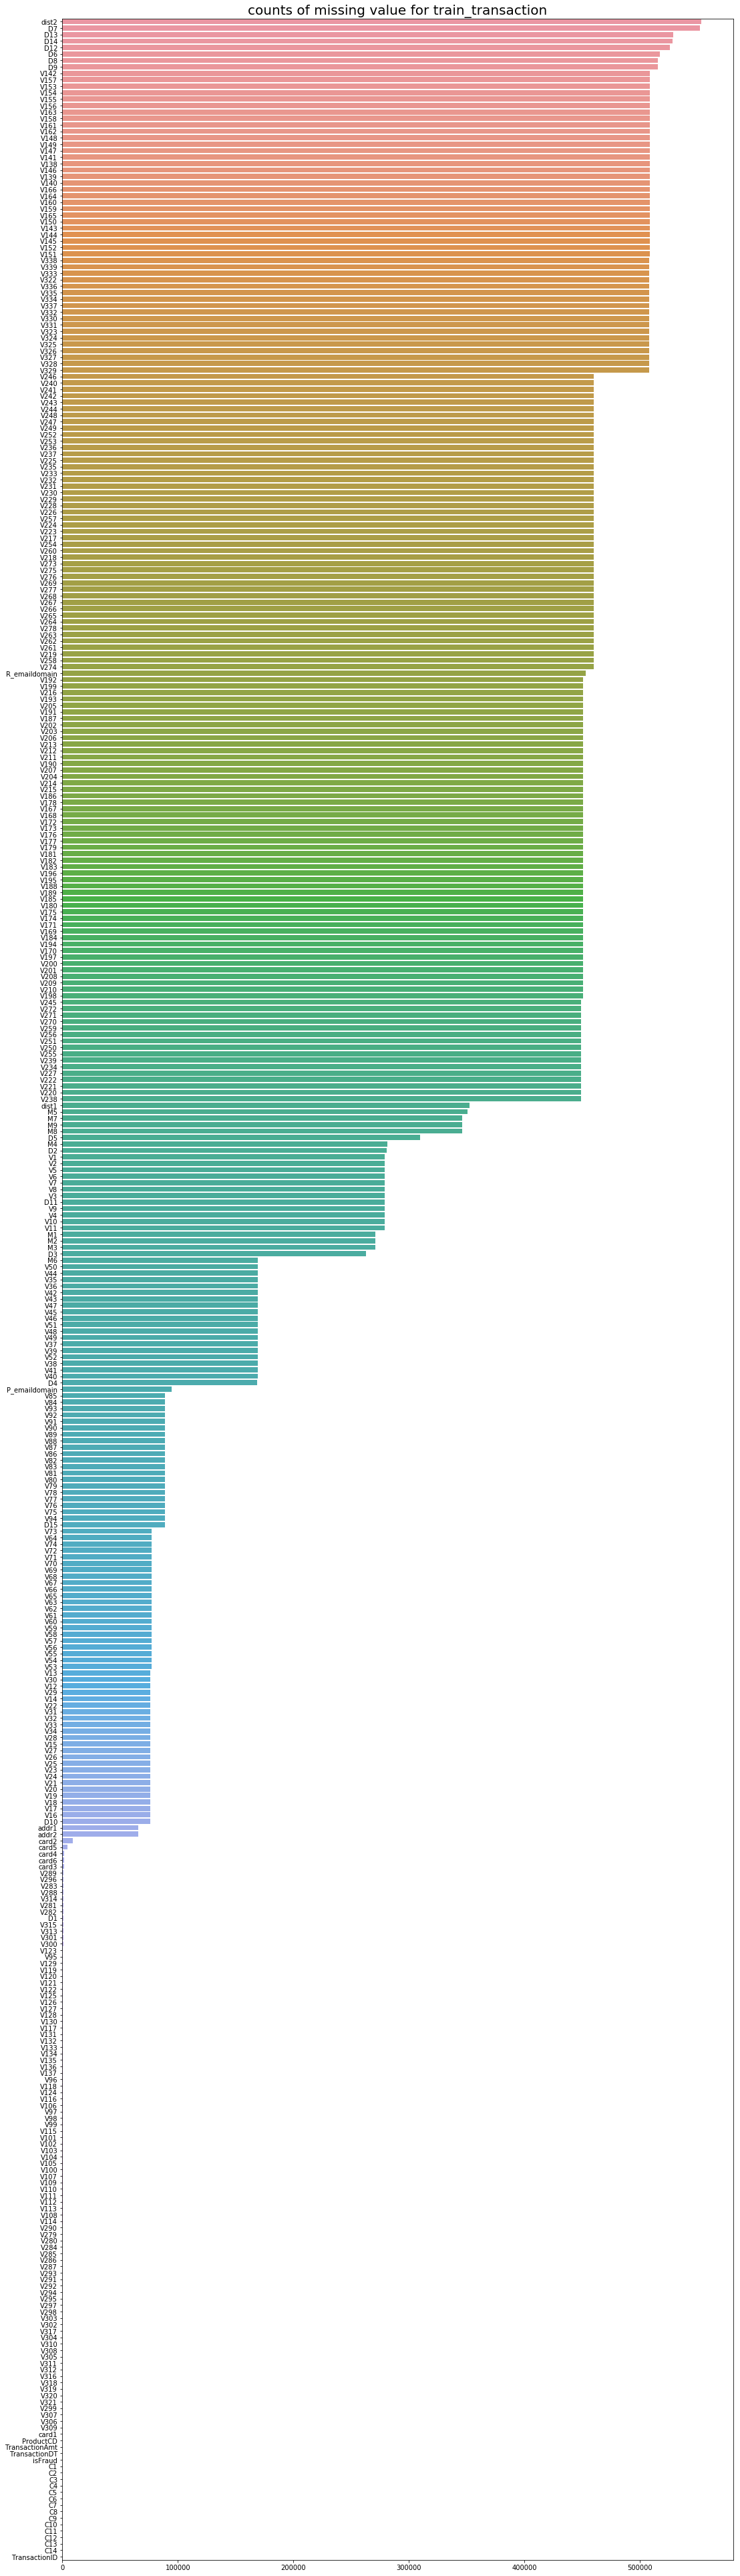

In [13]:
plt.figure(figsize=(18,70))
sns.barplot(x=train_transaction.isnull().sum().sort_values(ascending=False),y=train_transaction.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for train_transaction",size=20)

In [14]:

train_transaction_new=pd.DataFrame(train_transaction,columns=train_transaction.isnull().sum().sort_values()[:250].index)
train_transaction_new=train_transaction_new.drop(columns=['TransactionID'])
train_transaction_new_label=train_transaction_new.isFraud
train_transaction_new=train_transaction_new.drop(columns=['isFraud'])
train_transaction_new.head()

,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,...,V272,V245,V198,V210,V209,V208,V201,V200,V197,V170
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [15]:
len(train_transaction_new)

590540

<h3 id="23">2.3 Visulization for test_transaction</h3>

In [16]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
len(test_transaction)

506691

Text(0.5, 1.0, 'counts of missing value for test_transaction')

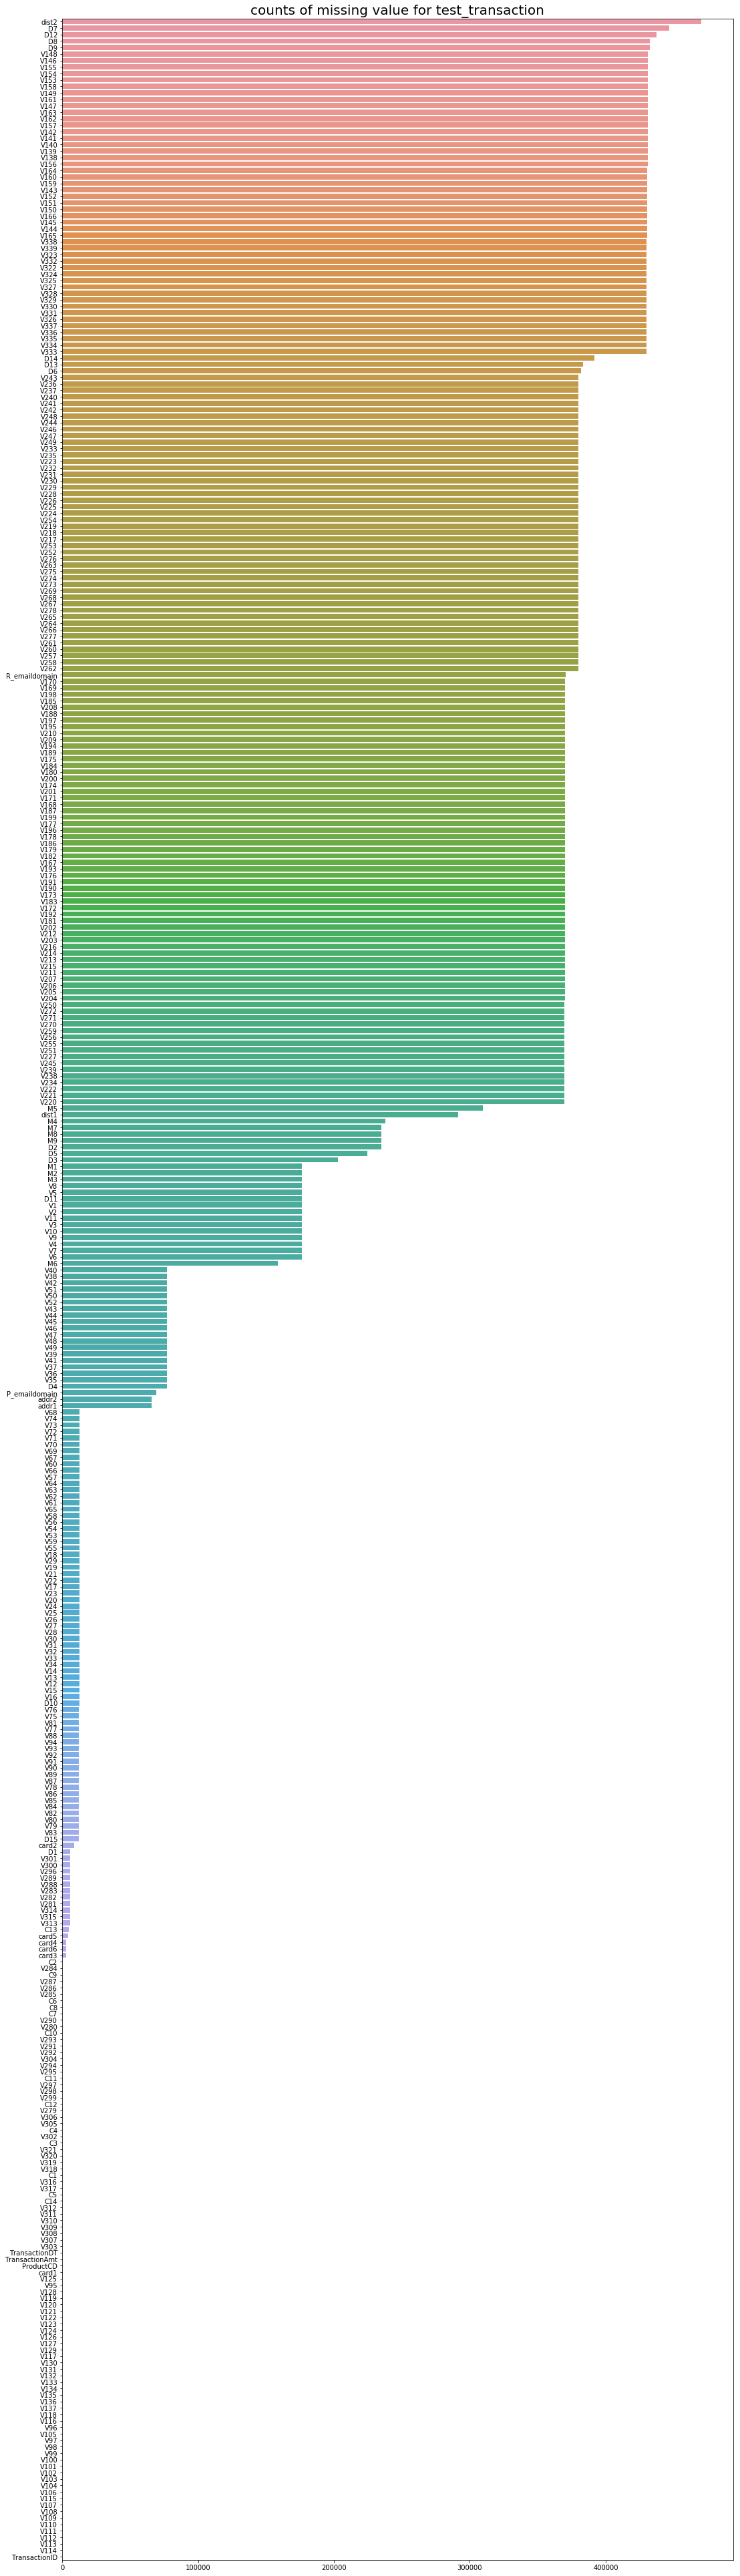

In [18]:
plt.figure(figsize=(18,70))
sns.barplot(x=test_transaction.isnull().sum().sort_values(ascending=False),y=test_transaction.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for test_transaction",size=20)

In [19]:
test_transaction_new=pd.DataFrame(test_transaction,columns=train_transaction.isnull().sum().sort_values()[:250].index)
del test_transaction
del train_transaction
ID=test_transaction_new.TransactionID
test_transaction_new=test_transaction_new.drop(columns=['TransactionID','isFraud'])
test_transaction_new.head()

,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,...,V272,V245,V198,V210,V209,V208,V201,V200,V197,V170
0,6.0,115.0,1.0,5.0,0.0,6.0,0.0,0.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,12.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,22.0,0.0,2.0,0.0,4.0,0.0,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,14.0,0.0,6.0,0.0,5.0,0.0,0.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
len(test_transaction_new)

506691

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in list(train_transaction_new.select_dtypes(include=['object']).columns):
    test_transaction_new[i] = labelencoder.fit_transform(test_transaction_new[i].astype('str'))
    train_transaction_new[i] = labelencoder.fit_transform(train_transaction_new[i].astype('str'))
test_transaction_new.ProductCD[:5]


0    4
1    4
2    4
3    4
4    4
Name: ProductCD, dtype: int64

In [22]:
train_transaction_new.ProductCD[:5]

0    4
1    4
2    4
3    4
4    1
Name: ProductCD, dtype: int64

In [23]:
#train_transaction_new=train_transaction_new.fillna(-999)
#test_transaction_new=test_transaction_new.fillna(-999)
train_transaction_new=train_transaction_new.fillna(train_transaction_new.median())
test_transaction_new=test_transaction_new.fillna(train_transaction_new.median())

# 3.LGBM/LR

In [24]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_transaction_new,train_transaction_new_label,test_size=0.2)
del train_transaction_new
lr = LogisticRegression(C=0.09,solver='lbfgs')  
lr.fit(X_train, y_train)  
proba_test = lr.predict_proba(X_test)[:, 1]
LR_result=pd.DataFrame({'pred':proba_test,'real':y_test})
LR_result['pred_0_1']=LR_result.pred.apply(lambda x:1 if x>=0.5 else 0)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [25]:
print('LR_acc: ',sum(LR_result.real==LR_result.pred_0_1)/len(LR_result))

LR_acc:  0.9644139262370034


In [26]:
import lightgbm as lgb  
import pickle  
from sklearn.metrics import roc_auc_score  
lgb_train = lgb.Dataset(X_train, y_train)  
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 
params = {  
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': {'binary_logloss', 'auc'},  
    'num_leaves':240,  
    'max_depth': 15,  
    'min_data_in_leaf': 100,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.95,  
    'bagging_fraction': 0.95,  
    'bagging_freq': 5,  
    'lambda_l1': 0,    
    'lambda_l2': 0, 
    'min_gain_to_split': 0.1,  
    'verbose': 0,  
    'is_unbalance': True  
}  

In [27]:
gbm = lgb.train(params,  lgb_train,  
                num_boost_round=10000,  
                valid_sets=lgb_eval,early_stopping_rounds=500)  

[1]	valid_0's auc: 0.874862	valid_0's binary_logloss: 0.134524
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.895486	valid_0's binary_logloss: 0.134138
[3]	valid_0's auc: 0.903034	valid_0's binary_logloss: 0.136061
[4]	valid_0's auc: 0.906229	valid_0's binary_logloss: 0.139323
[5]	valid_0's auc: 0.909241	valid_0's binary_logloss: 0.142825
[6]	valid_0's auc: 0.911819	valid_0's binary_logloss: 0.146738
[7]	valid_0's auc: 0.913652	valid_0's binary_logloss: 0.150758
[8]	valid_0's auc: 0.915386	valid_0's binary_logloss: 0.154755
[9]	valid_0's auc: 0.916524	valid_0's binary_logloss: 0.15895
[10]	valid_0's auc: 0.918166	valid_0's binary_logloss: 0.162943
[11]	valid_0's auc: 0.919304	valid_0's binary_logloss: 0.166885
[12]	valid_0's auc: 0.920319	valid_0's binary_logloss: 0.170718
[13]	valid_0's auc: 0.92098	valid_0's binary_logloss: 0.174555
[14]	valid_0's auc: 0.922337	valid_0's binary_logloss: 0.178089
[15]	valid_0's auc: 0.92325	valid_0's binary_logloss

In [28]:
gbm.predict(test_transaction_new[:10], num_iteration=gbm.best_iteration) 

array([4.43943153e-06, 2.62249281e-05, 5.15282350e-05, 4.45085668e-04,
       1.76418146e-05, 8.73306011e-05, 3.13041041e-06, 1.80649559e-03,
       3.33031276e-06, 1.09635264e-02])

In [29]:
LR_TEST=lr.predict_proba(test_transaction_new)[:, 1]
LGBM_TEST= gbm.predict(test_transaction_new, num_iteration=gbm.best_iteration) 

prediction=pd.DataFrame({'TransactionID':ID,'LR_TEST':LR_TEST,'LGBM_TEST':LGBM_TEST})

prediction.to_csv('prediction.csv',index=False)

submission=pd.DataFrame({'TransactionID':ID,'isFraud':LGBM_TEST})


submission.to_csv('submission.csv',index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 